# Regression Models

In this lab, we will explore various regression models for Boston Houses Dataset. We will use regression to predict Boston house prices. We will explore both Ordinary Least Squares and also explore other regression variant of popular classifiers such as decision trees and SVM.

We will largely make use of the Scikit-Learn libraries (http://scikit-learn.org/stable/). You can find tutorials and user guide at http://scikit-learn.org/stable/documentation.html.

In [1]:
%matplotlib inline 

#Array processing
import numpy as np

#Data analysis, wrangling and common exploratory operations
import pandas as pd
from pandas import Series, DataFrame

#For visualization. Matplotlib for basic viz and seaborn for more stylish figures + statistical figures not in MPL.
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import Image

from sklearn.datasets import load_boston                                                                       
from sklearn.utils import shuffle                                                                                                                                                                      
from sklearn import metrics                                                                                                  
from sklearn import tree                                                                                                     
from sklearn.tree import DecisionTreeRegressor                                                                                                             
from sklearn.svm import SVC, LinearSVC , SVR                                                                                 
from sklearn.linear_model import LinearRegression                                            
from sklearn.ensemble import RandomForestRegressor                                                                                                          
from sklearn.model_selection import KFold, train_test_split, cross_val_score, GridSearchCV                                               
from sklearn.preprocessing import StandardScaler

import pydot 

#######################End imports###################################


In [2]:
#Do not make any changes in this cell
boston = load_boston()  
print("Data dimension = ", boston.data.shape) 
print("\nAttribute names = ", boston.feature_names)
print("\nThe median values of house prices (in $1000's), max = %.3f, min = %.3f, average = %.3f,"
      % (np.max(boston.target), np.min(boston.target), np.mean(boston.target)) ) 
print("\n", boston.DESCR)
print('test from pycharm')
print('test from pycharm2')

Data dimension =  (506, 13)

Attribute names =  ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']

The median values of house prices (in $1000's), max = 50.000, min = 5.000, average = 22.533,

 .. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units bui

In [3]:
#Do not make any changes in this cell.
print("Data dimension = ", boston.data.shape)
print("\nThe first row of data = ", boston.data[0])
print("\nTarget dimension = ", boston.target.shape)
print("\nBefore transformation: ", np.max(boston.data), np.min(boston.data), np.mean(boston.data))

#Split the data into the training set and the test set
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.25, random_state=33)

#Scale the data - important for regression. Learn what this function does
scalerX = StandardScaler().fit(X_train)
scalery = StandardScaler().fit(y_train.reshape(-1, 1))

X_train = scalerX.transform(X_train)  
y_train = scalery.transform(y_train.reshape(-1, 1))  
X_test = scalerX.transform(X_test)    
y_test = scalery.transform(y_test.reshape(-1, 1))

print("\nAfter transformation: ", np.max(X_train), np.min(X_train), np.mean(X_train), np.max(y_train), np.min(y_train), np.mean(y_train))

Data dimension =  (506, 13)

The first row of data =  [6.320e-03 1.800e+01 2.310e+00 0.000e+00 5.380e-01 6.575e+00 6.520e+01
 4.090e+00 1.000e+00 2.960e+02 1.530e+01 3.969e+02 4.980e+00]

Target dimension =  (506,)

Before transformation:  711.0 0.0 70.07396704469443

After transformation:  10.190454845432923 -4.6670204084548 2.4732713452985016e-15 2.9177492036731256 -1.931470986413033 3.5855223803197665e-16


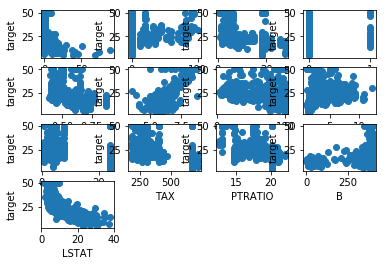

In [4]:
#task t1
#Create 13 scatter plots such that variables (CRIM to LSTAT) are in X axis and MEDV in y-axis.
#Organize the images such that the images are in 3 rows of 4 images each and 1 in last row

#You can refer to http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html
#to see how to create scatter plots

#Write code here
# plt.figure()
for i in range(13):
    # print(i)
    # plt
    plt.subplot(4, 4, i+1)
    X = boston.data[:, i]
    # if i == 12:
    #     print(X)
    y = boston.target
    # x_min, x_max = X.min(), X.max()
    # y_min, y_max = y.min(), y.max()
    plt.xlabel(boston.feature_names[i])
    plt.ylabel('target')
    # plt.xlim(x_min, x_max)
    # plt.ylim(y_min, y_max)
    plt.scatter(X, y)

    # ax.title.set_text(boston.feature_names[i])
plt.show()

In [5]:
#Do not make any change here
#To make your life easy, I have created a function that 
# (a) takes a regressor object,(b) trains it (c) makes some prediction (d) evaluates the prediction
def train_and_evaluate(clf, X_train, y_train): 
    clf.fit(X_train, y_train)   
    print("Coefficient of determination on training set:",clf.score(X_train, y_train))
    cv = KFold(n_splits=5, random_state=1234, shuffle=True)
    scores = cross_val_score(clf, X_train, y_train, cv=cv)   
    print("Average coefficient of determination using 5-fold crossvalidation:",np.mean(scores))
    
def plot_regression_fit(actual, predicted):
    plt.scatter(actual, predicted)
    plt.plot([0, 50], [0, 50], '--k')
    plt.axis('tight')
    plt.xlabel('True price ($1000s)')
    plt.ylabel('Predicted price ($1000s)') 
    plt.show()

Coefficient of determination on training set: 0.7550548859241807
Average coefficient of determination using 5-fold crossvalidation: 0.7132566948184942


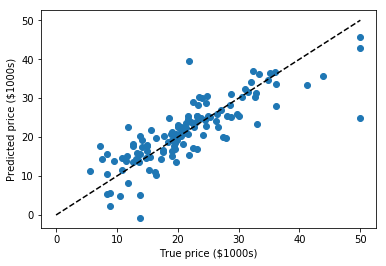

In [6]:
#task t2
#create a regressor object based on LinearRegression
# See http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
#Change the following line as appropriate
clf_ols = LinearRegression()

train_and_evaluate(clf_ols,X_train,y_train) 
clf_ols_predicted = clf_ols.predict(X_test) 

#why using inverse_transform below?
plot_regression_fit(scalery.inverse_transform(y_test), scalery.inverse_transform(clf_ols_predicted))

Coefficient of determination on training set: 0.7179419427730855
Average coefficient of determination using 5-fold crossvalidation: 0.6915092204505066


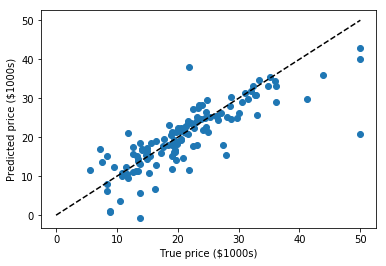

Coefficient of determination on training set: 0.9038606078643803
Average coefficient of determination using 5-fold crossvalidation: 0.8263360919929716


C:\Users\yanch\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\yanch\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\yanch\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\yanch\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

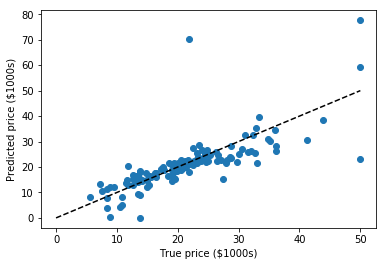

Coefficient of determination on training set: 0.900198918588965
Average coefficient of determination using 5-fold crossvalidation: 0.8337892384478177


C:\Users\yanch\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\yanch\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\yanch\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\yanch\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

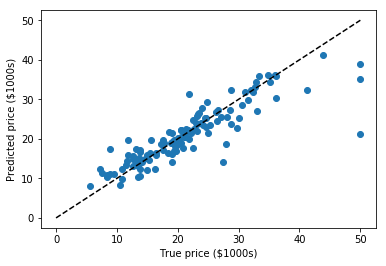

In [7]:
#task t3
#See http://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html

#Create a regression based on Support Vector Regressor. Set the kernel to linear
#Change the following line as appropriate
clf_svr= SVR(kernel='linear')  
train_and_evaluate(clf_svr,X_train,y_train.ravel()) 
clf_svr_predicted = clf_svr.predict(X_test) 
plot_regression_fit(scalery.inverse_transform(y_test), scalery.inverse_transform(clf_svr_predicted))   

#Create a regression based on Support Vector Regressor. Set the kernel to polynomial
#Change the following line as appropriate
clf_svr_poly=SVR(kernel='poly')
train_and_evaluate(clf_svr_poly,X_train,y_train.ravel()) 
clf_svr_poly_predicted = clf_svr_poly.predict(X_test)      
plot_regression_fit(scalery.inverse_transform(y_test), scalery.inverse_transform(clf_svr_poly_predicted)) 

#Create a regression based on Support Vector Regressor. Set the kernel to rbf
#Change the following line as appropriate
clf_svr_rbf= SVR(kernel='rbf')
train_and_evaluate(clf_svr_rbf,X_train,y_train.ravel())
clf_svr_rbf_predicted = clf_svr_rbf.predict(X_test)    
plot_regression_fit(scalery.inverse_transform(y_test), scalery.inverse_transform(clf_svr_rbf_predicted))

Coefficient of determination on training set: 1.0
Average coefficient of determination using 5-fold crossvalidation: 0.632463036031493


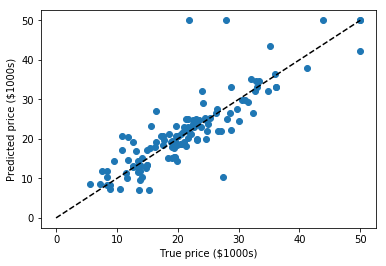

In [19]:
#task t4
#See http://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html
#Create regression tree
#Change the following line as appropriate
clf_cart = DecisionTreeRegressor()  
train_and_evaluate(clf_cart,X_train,y_train) 
clf_cart_predicted = clf_cart.predict(X_test)  
plot_regression_fit(scalery.inverse_transform(y_test), scalery.inverse_transform(clf_cart_predicted))  


Coefficient of determination on training set: 0.9677166264697507
Average coefficient of determination using 5-fold crossvalidation: 0.8352329689133553

Feature ranking:
1. feature 5-RM (0.594139)
2. feature 12-LSTAT (0.235675)
3. feature 7-DIS (0.053556)
4. feature 0-CRIM (0.028987)
5. feature 9-TAX (0.022561)
6. feature 4-NOX (0.015739)
7. feature 10-PTRATIO (0.014719)
8. feature 11-B (0.010314)
9. feature 6-AGE (0.010036)
10. feature 2-INDUS (0.009952)
11. feature 8-RAD (0.002863)
12. feature 1-ZN (0.001096)
13. feature 3-CHAS (0.000362)


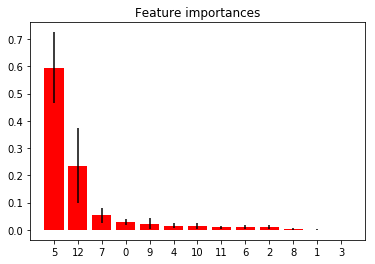

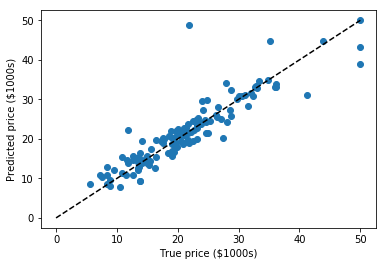

In [8]:
#task t5
#See http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor
#Create a random forest regressor with 10 estimators and random state as 1234
#Change the following line as appropriate
clf_rf= RandomForestRegressor(random_state=1234, n_estimators=10)
train_and_evaluate(clf_rf,X_train,y_train.ravel())  

#The following prints the most important features
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],axis=0)
indices = np.argsort(clf_rf.feature_importances_)[::-1]

# Print the feature ranking
print("\nFeature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d-%s (%f)" % (f + 1, indices[f], boston.feature_names[indices[f]], clf_rf.feature_importances_[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), clf_rf.feature_importances_[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

clf_rf_predicted = clf_rf.predict(X_test)      
plot_regression_fit(scalery.inverse_transform(y_test), scalery.inverse_transform(clf_rf_predicted)) 